# Audio Processing Basics

This tutorial introduces to basics of processing digital audio in Python

* 

## General Requirements

In [78]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import IPython

## Requirements for Digital Audio Processing

### Audio Processing Library

Tell Tensorflow which GPU to use (if you have more than one)

In [79]:
import librosa

## Data

**Music Speech Data Set**

by *George Tzanetakis*. Collected for the purposes of music/speech discrimination. Consists of 128 tracks, each 30 seconds long. Each class (music/speech) has 64 examples in 22050Hz Mono 16-bit WAV audio format. 

In [3]:
DATASET_PATH = "/home/schindler/tutorials/mlprague2018/data/gtzan_music_speech"

**Load Metadata**

In [4]:
metadata         = pd.read_csv("%s/filelist_wav_relpath_wclasses.txt" % DATASET_PATH, sep="\t", header=None)
metadata.columns = ["filename", "label"]

# Processing Audio

**Loading an Audio File**

In [5]:
y, sample_rate = librosa.load("%s/%s" % (DATASET_PATH, metadata.iloc[0].filename), mono=True)

Visualize Audio File

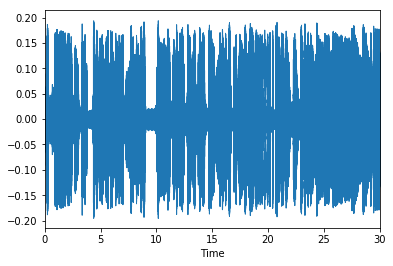

In [6]:
from librosa import display
librosa.display.waveplot(y, sr=sample_rate);

In [7]:
IPython.display.Audio("%s/%s" % (DATASET_PATH, metadata.iloc[0].filename))

**Fourier Transform**

In [8]:
spectrogram = librosa.stft(y,
                           n_fft      = 1024,
                           hop_length = 512)

/home/schindler/anaconda/python2/envs/py36/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):
/home/schindler/anaconda/python2/envs/py36/lib/python3.6/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


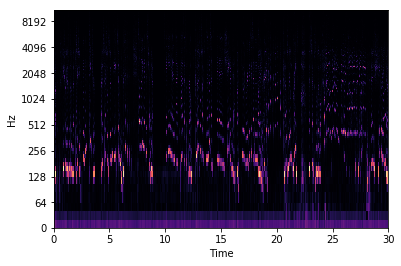

In [9]:
librosa.display.specshow(spectrogram, y_axis='log', x_axis='time');

Log-amplitude transformation / Decibel Transformation

In [10]:
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

Show Spectrogram

/home/schindler/anaconda/python2/envs/py36/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


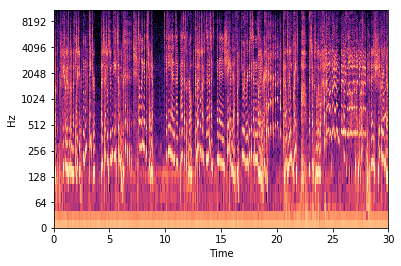

In [11]:
librosa.display.specshow(spectrogram_db, y_axis='log', x_axis='time');

**Mel-Transform**

In [12]:
power_spectrogram = np.abs(spectrogram)**2

melspec           = librosa.feature.melspectrogram(S      = power_spectrogram,
                                                   n_mels = 80,
                                                   fmax   = 8000)

In [13]:
melspec_db = librosa.power_to_db(melspec, ref = np.max)

In [14]:
melspec_db.shape

(80, 1292)

/home/schindler/anaconda/python2/envs/py36/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


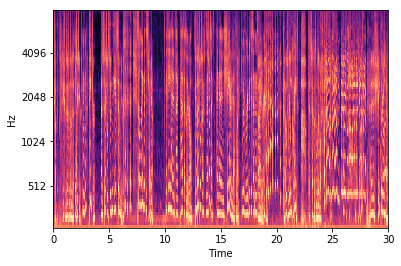

In [15]:
librosa.display.specshow(melspec_db, y_axis='mel', fmax=8000, x_axis='time');

# Extract Features for Example 1

## Define Feature extraction Function

In [16]:
def load_mel_spec(filename, n_mels=40, n_frames = 80, n_fft = 512, hop_length = 256):

    # load audio data
    y, sample_rate = librosa.load(filename, mono=True)
    
    # calc mel-spectrogram
    S = librosa.feature.melspectrogram(y = y, sr = sample_rate, n_mels=n_mels, n_fft = n_fft, hop_length=hop_length, fmax = 8000)
    
    # convert to Decibel
    S = librosa.power_to_db(S, ref = np.max)
    
    # take a sample from 
    center_frame_idx = S.shape[1] / 2
    offset           = int(center_frame_idx - n_frames / 2)
    
    return S[:,offset:(offset+n_frames)]

## Process Dataset

In [17]:
mel_spectrogram_segments = []

for filename in metadata.filename:
    
    mel_spec = load_mel_spec("%s/%s" % (DATASET_PATH, filename))
    
    mel_spectrogram_segments.append(mel_spec)

In [18]:
# convert result list to numpy array
mel_spectrogram_segments = np.asarray(mel_spectrogram_segments)

In [19]:
mel_spectrogram_segments.shape

(128, 40, 80)

## Store Dataset

In [20]:
np.savez("%s/mel_spectrogram_segments" % DATASET_PATH, 
         data      = mel_spectrogram_segments, 
         filenames = metadata.filename)